In [1]:
import tweepy
import ast
import os
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from tweepy import OAuthHandler

factory = StemmerFactory()
stemmer = factory.create_stemmer()
listStopword =  set(stopwords.words('indonesian'))  

In [2]:
df = pd.read_csv('serebu.csv')
df

,Unnamed: 0,Created_At,Tweets,Clean_Data,Tweet_Normal,Tanpa_StopWords,Stemming,Bobot,Label,Sentimen
0,0,2021-12-22 12:44:17+00:00,"when lo mau pesen sesuatu di syopifud, but syo...",when lo mau pesen sesuatu di syopifud but syop...,when kamu mau pesan sesuatu di syopifud but sy...,when pesan syopifud but syopipey it the level ...,"['when', 'pesan', 'syopifud', 'but', 'syopipey...",6,positive,1.0
1,1,2021-12-22 12:21:03+00:00,"""Kok aku demam ya?""\n""Abis dr mana km? Cek cb ...",kok aku demam ya abis dr mana km cek cb pake t...,kok saya demam ya habis dari mana kamu cek cob...,demam habis cek coba pakai termometer nek minu...,"['demam', 'habis', 'cek', 'coba', 'pakai', 'te...",-2,negative,0.0
2,2,2021-12-22 11:58:44+00:00,Please hujan reda dong w mau ke warung mau mas...,please hujan reda dong mau ke warung mau masak...,tolong hujan reda dong mau ke warung mau masa ...,tolong hujan reda warung order syopifud kesian...,"['tolong', 'hujan', 'reda', 'warung', 'order',...",1,positive,1.0
3,3,2021-12-22 10:06:15+00:00,@naaazzzs Gaada gofud adanya syopifud nas 😭😭 h...,gaada gofud adanya syopifud nas,tidak ada gofud adanya syopifud nas,gofud syopifud nas,"['gofud', 'syopifud', 'nas']",0,neutral,2.0
4,4,2021-12-22 09:17:04+00:00,"@convomf pake syopifud nder, diskonnya mantep",pake syopifud nder diskonnya mantep,pakai syopifud nder diskonnya mantep,pakai syopifud nder diskonnya mantep,"['pakai', 'syopifud', 'nder', 'diskon', 'mantep']",2,positive,1.0
...,...,...,...,...,...,...,...,...,...,...
191,191,2021-12-14 04:31:09+00:00,jends ada yg udh coba syopifud di pwt? aman ga...,jends ada yg udh coba syopifud di pwt aman gak...,jends ada yang sudah coba syopifud di pwt aman...,jends coba syopifud pwt aman gakk toktok aman ...,"['jends', 'coba', 'syopifud', 'pwt', 'aman', '...",2,positive,1.0
192,192,2021-12-14 03:43:49+00:00,@armyfess_ ini harus beli langsung ya? aku lia...,ini harus beli langsung ya aku liat di syopifu...,ini harus beli langsung ya saya lihat di syopi...,beli langsung lihat syopifud toko tutup,"['beli', 'langsung', 'lihat', 'syopifud', 'tok...",6,positive,1.0
193,193,2021-12-14 02:32:58+00:00,@doggopaww Pake syopifud coba ada gratis ongki...,pake syopifud coba ada gratis ongkir sama disk...,pakai syopifud coba ada gratis ongkir sama pot...,pakai syopifud coba gratis ongkir potongan harga,"['pakai', 'syopifud', 'coba', 'gratis', 'ongki...",7,positive,1.0
194,194,2021-12-14 02:19:41+00:00,"@seokjinita sama beibb punyaku jg, malah chati...",sama beibb punyaku jg malah chatime close app ...,sama beibb punyaku juga malah chatime close ap...,beibb punyaku chatime close aplikasi gojek tut...,"['beibb', 'punya', 'chatime', 'close', 'aplika...",-2,negative,0.0


In [2]:
data.to_csv("stemming-coba.csv")

NameError: name 'data' is not defined

In [ ]:
word_dict = {}
for i in range(0,len(df['Stemming'])):
    sentence = df['Stemming'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('kebutuhan/full_lexicon.csv')
lexicon = lexicon.reset_index(drop=True)

In [ ]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

ns_words = []

for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

In [3]:
word_dict = {}
for i in range(0,len(df['Stemming'])):
    sentence = df['Stemming'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [4]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('kebutuhan/full_lexicon.csv')

lexicon = lexicon.reset_index(drop=True)

lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']
ns_words = []
            
sencol =[]
senrow =np.array([])
nsen = 0

sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Stemming'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [10]:
sencol =[]
senrow =np.array([])
nsen = 0

sentiment_list = []
def found_word(ind,words,word,sen,sencol,sentiment,add):
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
        sencol.append(word)
        sen.append(1)
        add += 1
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen,sencol,sentiment,add

for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Stemming'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]

    for word in words:
        ind = words.index(word)
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)

    if add>0:
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
            
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))

    sentiment_list.append(sentiment)

In [14]:
tfidf = TfidfVectorizer()
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)
x_train = tfidf.fit_transform(train.Stemming.values)
x_test = tfidf.transform(test.Stemming.values)
y_train = train.Sentimen.values
y_test = test.Sentimen.values
SVM = svm.SVC(kernel='linear')
model = SVM.fit(x_train, y_train)
y_pred = model.predict(x_test)
test = test.drop(columns=['Sentimen'])
test['Sentimen'] = y_pred
test = test[['Created_At', 'Tweets', 'Clean_Data', 'Tweet_Normal', 'Tanpa_StopWords', 'Stemming', 'Bobot', 'Label', 'Sentimen']]

In [15]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.9


In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df['Tweets'], df['Sentimen'], test_size=0.1, random_state=0)
train_df = pd.DataFrame()
train_df['Tweets'] = x_train
train_df['Sentimen'] = y_train
test_df = pd.DataFrame()
test_df['Tweets'] = x_test
test_df['Sentimen'] = y_test
tfidf = TfidfVectorizer()  
docs = df['Tweets']
x = tfidf.fit(docs)
x_train_tfidf = x.transform(x_train)
x_test_tfidf = x.transform(x_test)
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train_tfidf, y_train)
predictions_SVM = SVM.predict(x_test_tfidf)

In [28]:
print('Accuracy score: ', accuracy_score(y_test, predictions_SVM))

Accuracy score:  0.9


In [6]:
confusion_matrix = confusion_matrix(y_test, predictions_SVM)
print('Confusion Matrix : ') 
print(confusion_matrix)
print('\n Report Hasil : ') 
print(classification_report(y_test, predictions_SVM))

Confusion Matrix : 
[[ 0  4  0]
 [ 0 12  0]
 [ 0  4  0]]

 Report Hasil : 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.60      1.00      0.75        12
         2.0       0.00      0.00      0.00         4

    accuracy                           0.60        20
   macro avg       0.20      0.33      0.25        20
weighted avg       0.36      0.60      0.45        20



C:\Users\HP\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
word_tfidf = tfidf.fit_transform(df['Tweets'].values)

In [9]:
df['Sentimen'] = SVM.predict(word_tfidf)

No handles with labels found to put in legend.


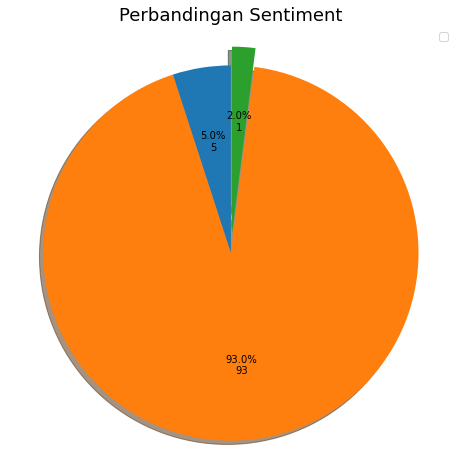

In [44]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data['Stemming'].groupby(data['Sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

ValueError: x must be 1D

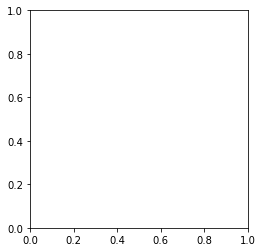

In [21]:
x = test['Sentimen'].value_counts()
explode = [0, 0.1, 0]
labels = ['Netral', 'Positif', 'Negatif']
colors = ['brown', 'lightcoral', 'beige']

def make_autopct(values):
    def my_autopct(pct):
        total  = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(x, colors=colors, labels=labels, explode=explode,
      autopct=make_autopct(x), shadow=True, startangle=90)
plt.legend()
plt.show